In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [16]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [17]:
print(df1.shape)
print(df2.shape)

(1460, 81)
(439, 80)


# Data Analysis

In [18]:
df1.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
print("Train Dataset Info")
print ("Rows     : " ,df1.shape[0])
print ("Columns  : " ,df1.shape[1])
print ("\nFeatures : \n" ,df1.columns.tolist())
print ("\nMissing values :  ",df1.isnull().sum().values.sum())
print ("\nUnique values :  \n",df1.nunique())

Train Dataset Info
Rows     :  1460
Columns  :  81

Features : 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 

In [20]:
df2.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1022,20,RL,64.0,7406,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,New,Partial
1,1023,50,RM,52.0,9439,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
2,1024,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
3,1025,20,RL,NaN,15498,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,COD,Abnorml
4,1026,20,RL,70.0,7700,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Normal


In [21]:
print("Test Dataset Info")
print ("Rows     : " ,df2.shape[0])
print ("Columns  : " ,df2.shape[1])
print ("\nFeatures : \n" ,df2.columns.tolist())
print ("\nMissing values :  ",df2.isnull().sum().values.sum())
print ("\nUnique values :  \n",df2.nunique())

Test Dataset Info
Rows     :  439
Columns  :  80

Features : 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'E

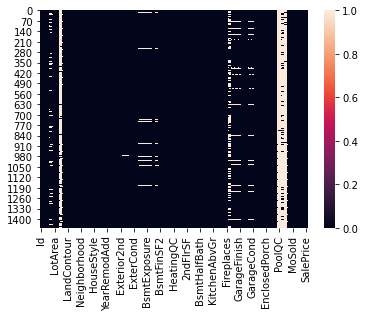

In [22]:
#Train null values
sns.heatmap(df1.isnull())

In [23]:
# Train null list
nullist = []
nullist = df1.isnull().sum()
#nullist.loc[nullist != 0]
nul = pd.DataFrame(nullist.loc[nullist != 0])
nul

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


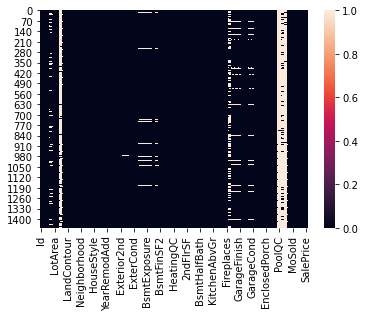

In [24]:
#Test null values
sns.heatmap(df1.isnull())

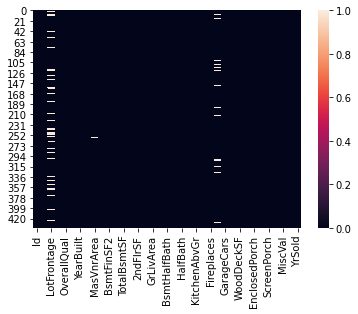

In [25]:
# Numeric Nulls in Test
cols = df2.columns
num_cols = df2._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

sns.heatmap(df2[num_cols].isnull())

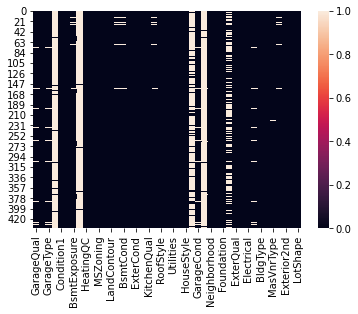

In [26]:
# Categorical null cols in test
sns.heatmap(df2[cat_cols].isnull())

# Data Cleaning

In [27]:
#droping columns with many null values
drop_columns = ['FireplaceQu','PoolQC','Fence','MiscFeature','BsmtUnfSF']
df1.drop(drop_columns, axis = 1, inplace = True)
df2.drop(drop_columns, axis = 1, inplace = True)

In [28]:
cols = df1.columns
num_cols = df1._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [29]:
fill_col = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'GarageType','GarageFinish','GarageCond']
for i in fill_col:
    print(i,"values :\n",df1[i].value_counts())
    print("_____________________")

Alley values :
 Grvl    50
Pave    41
Name: Alley, dtype: int64
_____________________
MasVnrType values :
 None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
_____________________
BsmtQual values :
 TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
_____________________
BsmtCond values :
 TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
_____________________
BsmtExposure values :
 No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
_____________________
BsmtFinType1 values :
 Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
_____________________
BsmtFinType2 values :
 Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
_____________________
GarageType values :
 Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
__

In [30]:
# Categorical data
for i in cat_cols:
    print(i,"values :\n",df1[i].value_counts())
    print("_____________________")

GarageQual values :
 TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
_____________________
Functional values :
 Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
_____________________
GarageType values :
 Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
_____________________
Condition1 values :
 Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
_____________________
Alley values :
 Grvl    50
Pave    41
Name: Alley, dtype: int64
_____________________
CentralAir values :
 Y    1365
N      95
Name: CentralAir, dtype: int64
_____________________
BsmtExposure values :
 No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
_____________________
MSZoning values :
 RL         1151


In [31]:
# Filling No where Nan in Categorical data
for col in df1[fill_col]:
    df1[col] = df1[col].fillna('None')
for col in df2[fill_col]:
    df2[col] = df2[col].fillna('None')

In [32]:
colfil = ['BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars', 
            'GarageArea']
for coll in colfil:
    df2[coll].fillna(df2[coll].median(), inplace = True)

In [33]:
num_cols = df1._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))


In [34]:
df1['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

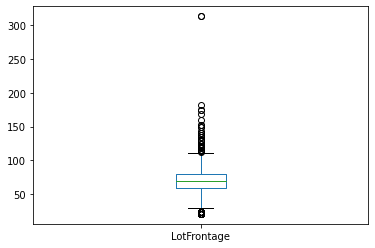

In [35]:
(df1['LotFrontage'].plot.box()) 

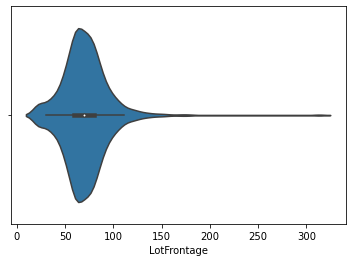

In [36]:
sns.violinplot(df1['LotFrontage'])

In [37]:
# replace null with median as there are many outliers
df1['LotFrontage'].fillna(value=df1['LotFrontage'].median(),inplace=True)
df2['LotFrontage'].fillna(value=df2['LotFrontage'].median(),inplace=True)

In [38]:
df1.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

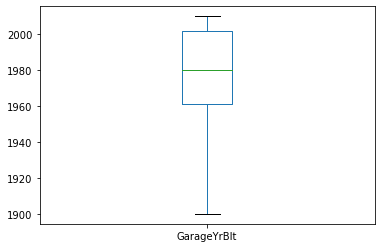

In [39]:
(df1['GarageYrBlt'].plot.box())

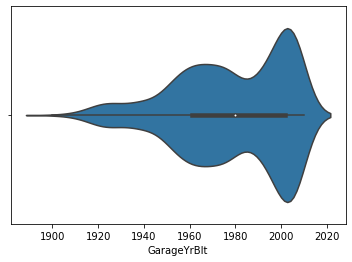

In [40]:
sns.violinplot(df1['GarageYrBlt'])

In [41]:
# replace null with mean as there are many outliers
df1['GarageYrBlt'].fillna(value=df1['GarageYrBlt'].mean(),inplace=True)
df2['GarageYrBlt'].fillna(value=df2['GarageYrBlt'].mean(),inplace=True)

In [42]:
df1['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

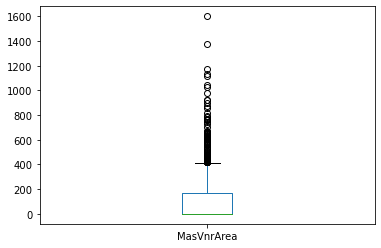

In [43]:
(df1['MasVnrArea'].plot.box())

In [44]:
# replace null with median as there are many outliers
df1['MasVnrArea'].fillna(value=df1['MasVnrArea'].median(),inplace=True)
df2['MasVnrArea'].fillna(value=df2['MasVnrArea'].median(),inplace=True)

In [45]:
df1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [46]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

In [47]:
# Creating some Featrues 
both_col = [df1, df2]
for col in both_col:
    col['YrBltAndRemod'] = col['YearBuilt'] + col['YearRemodAdd']
    col['TotalSF'] = col['TotalBsmtSF'] + col['1stFlrSF'] + col['2ndFlrSF']
    col['Total_sqr_footage'] = (col['BsmtFinSF1'] + col['BsmtFinSF2'] +
                                 col['1stFlrSF'] + col['2ndFlrSF'])

    col['Total_Bathrooms'] = (col['FullBath'] + (0.5 * col['HalfBath']) +
                               col['BsmtFullBath'] + (0.5 *col['BsmtHalfBath']))

    col['Total_porch_sf'] = (col['OpenPorchSF'] + col['3SsnPorch'] +
                              col['EnclosedPorch'] + col['ScreenPorch'] +
                              col['WoodDeckSF'])
## Binary some feature
both_col = [df1, df2]

In [48]:
## Binary some feature
both_col = [df1, df2]
for col in both_col:
    col['haspool'] = col['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    col['has2ndfloor'] = col['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    col['hasgarage'] = col['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    col['hasbsmt'] = col['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    col['hasfireplace'] = col['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


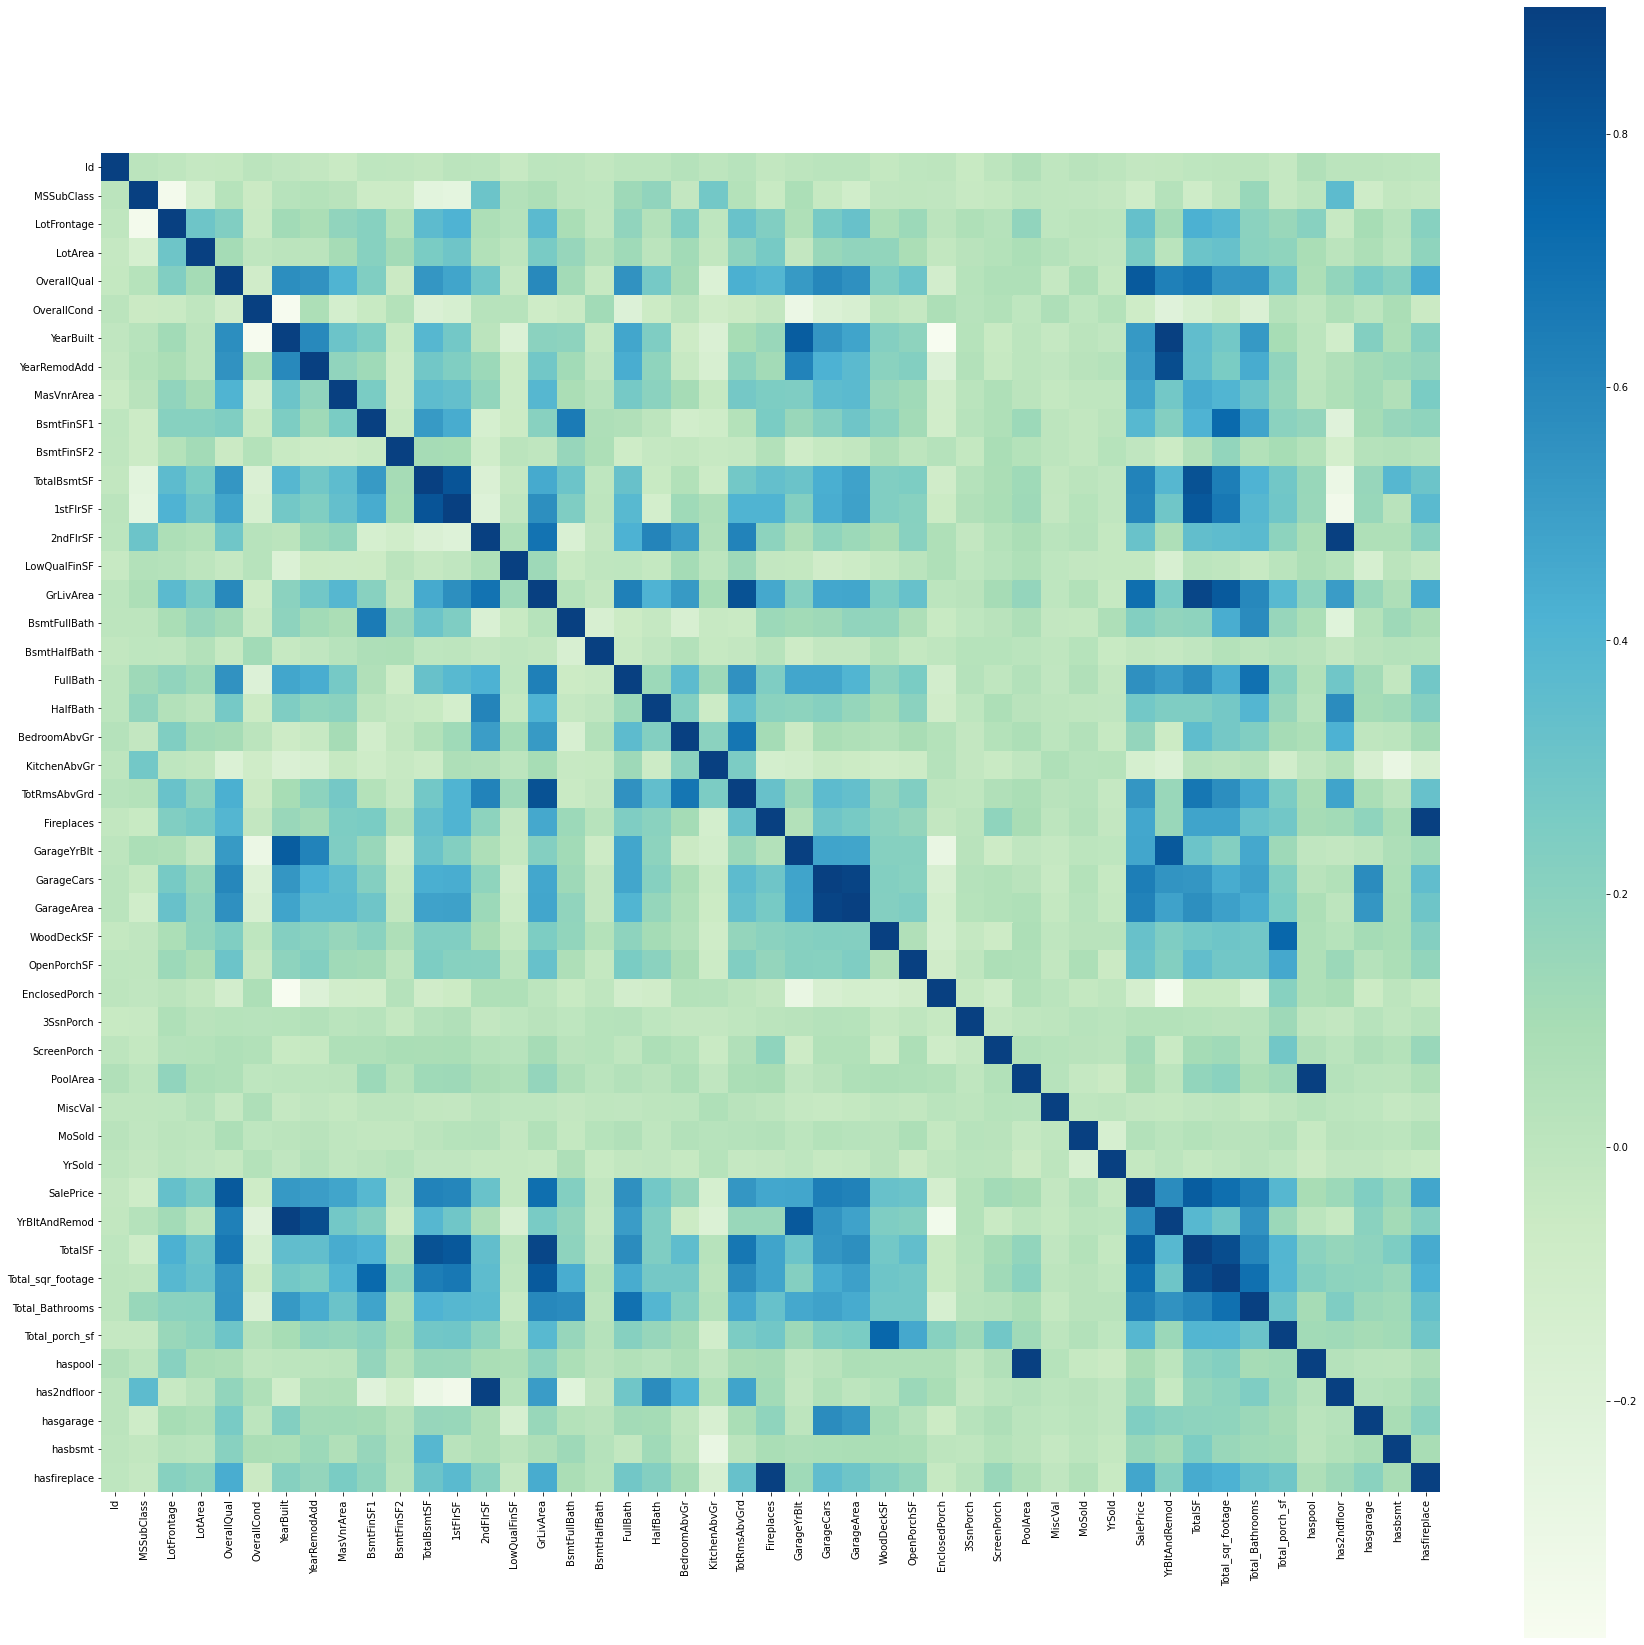

In [49]:
plt.subplots(figsize=(30,30))
sns.heatmap(df1.corr(),cmap="GnBu",vmax=0.9, square=True)

In [50]:
# droping some columns
drop_col = ['Exterior2nd','GarageYrBlt','Condition2','RoofMatl','Electrical','HouseStyle','Exterior1st',
            'Heating','GarageQual','Utilities','MSZoning','Functional','KitchenQual']
df1.drop(drop_col, axis = 1,inplace = True)
df2.drop(drop_col, axis = 1,inplace = True)

In [51]:
df1

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1,60,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,4006,2566,2416,3.5,61,0,1,1,1,0
1,2,20,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,3952,2524,2240,2.5,298,0,0,1,1,1
2,3,60,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,4003,2706,2272,3.5,42,0,1,1,1,1
3,4,70,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,3885,2473,1933,2.0,307,0,1,1,1,1
4,5,60,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,4000,3343,2853,3.5,276,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Pave,None,Reg,Lvl,Inside,Gtl,...,3999,2600,1647,2.5,40,0,1,1,1,1
1456,1457,20,85.0,13175,Pave,None,Reg,Lvl,Inside,Gtl,...,3966,3615,3026,3.0,349,0,0,1,1,1
1457,1458,70,66.0,9042,Pave,None,Reg,Lvl,Inside,Gtl,...,3947,3492,2615,2.0,60,0,1,1,1,1
1458,1459,20,68.0,9717,Pave,None,Reg,Lvl,Inside,Gtl,...,3946,2156,2156,2.0,478,0,0,1,1,0


In [52]:
df2

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1022,20,64.0,7406,Pave,None,Reg,Lvl,Inside,Gtl,...,4012,2419,1904,3.0,159,0,0,1,1,0
1,1023,50,52.0,9439,Pave,None,Reg,Lvl,Inside,Gtl,...,3880,2160,1572,1.0,192,0,1,1,1,0
2,1024,120,43.0,3182,Pave,None,Reg,Lvl,Inside,Gtl,...,4011,2850,1520,2.0,176,0,0,1,1,1
3,1025,20,68.0,15498,Pave,None,IR1,Lvl,Corner,Gtl,...,3952,4463,4463,3.0,246,0,0,1,1,1
4,1026,20,70.0,7700,Pave,None,Reg,Lvl,Corner,Gtl,...,3944,1764,1488,2.0,96,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,1456,60,62.0,7917,Pave,None,Reg,Lvl,Inside,Gtl,...,3999,2600,1647,2.5,40,0,1,1,1,1
435,1457,20,85.0,13175,Pave,None,Reg,Lvl,Inside,Gtl,...,3966,3615,3026,3.0,349,0,0,1,1,1
436,1458,70,66.0,9042,Pave,None,Reg,Lvl,Inside,Gtl,...,3947,3492,2615,2.0,60,0,1,1,1,1
437,1459,20,68.0,9717,Pave,None,Reg,Lvl,Inside,Gtl,...,3946,2156,2156,2.0,478,0,0,1,1,0


In [53]:
cols = df1.columns
num_cols = df1._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))


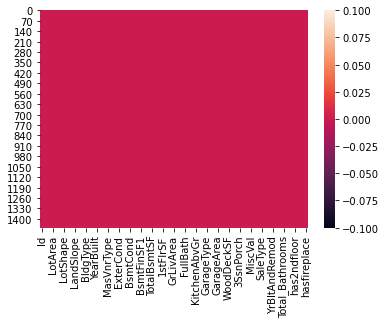

In [54]:
sns.heatmap(df1.isnull())

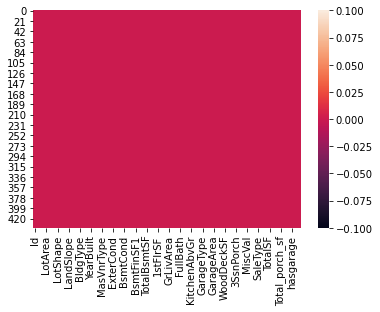

In [55]:
sns.heatmap(df2.isnull())

In [56]:
df2[cat_cols]

,GarageType,Condition1,Alley,CentralAir,BsmtExposure,Street,LandContour,HeatingQC,BsmtCond,BsmtQual,...,Neighborhood,LandSlope,Foundation,ExterQual,BldgType,GarageFinish,MasVnrType,BsmtFinType2,SaleCondition,LotShape
0,Attchd,Norm,None,Y,Av,Pave,Lvl,Ex,TA,Gd,...,CollgCr,Gtl,PConc,Gd,1Fam,RFn,Stone,Unf,Partial,Reg
1,Detchd,Norm,None,Y,No,Pave,Lvl,Gd,TA,TA,...,OldTown,Gtl,CBlock,TA,1Fam,Unf,None,Unf,Normal,Reg
2,Attchd,Norm,None,Y,No,Pave,Lvl,Ex,Gd,Gd,...,Blmngtn,Gtl,PConc,Gd,TwnhsE,Fin,BrkFace,Unf,Normal,Reg
3,Attchd,Norm,None,Y,Av,Pave,Lvl,TA,TA,Gd,...,Timber,Gtl,CBlock,Gd,1Fam,Fin,None,LwQ,Abnorml,IR1
4,Detchd,Norm,None,Y,No,Pave,Lvl,TA,TA,TA,...,CollgCr,Gtl,CBlock,TA,1Fam,Unf,None,Rec,Normal,Reg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,Attchd,Norm,None,Y,No,Pave,Lvl,Ex,TA,Gd,...,Gilbert,Gtl,PConc,TA,1Fam,RFn,None,Unf,Normal,Reg
435,Attchd,Norm,None,Y,No,Pave,Lvl,TA,TA,Gd,...,NWAmes,Gtl,CBlock,TA,1Fam,Unf,Stone,Rec,Normal,Reg
436,Attchd,Norm,None,Y,No,Pave,Lvl,Ex,Gd,TA,...,Crawfor,Gtl,Stone,Ex,1Fam,RFn,None,Unf,Normal,Reg
437,Attchd,Norm,None,Y,Mn,Pave,Lvl,Gd,TA,TA,...,NAmes,Gtl,CBlock,TA,1Fam,Unf,None,Rec,Normal,Reg


In [57]:
df1[cat_cols]

,GarageType,Condition1,Alley,CentralAir,BsmtExposure,Street,LandContour,HeatingQC,BsmtCond,BsmtQual,...,Neighborhood,LandSlope,Foundation,ExterQual,BldgType,GarageFinish,MasVnrType,BsmtFinType2,SaleCondition,LotShape
0,Attchd,Norm,None,Y,No,Pave,Lvl,Ex,TA,Gd,...,CollgCr,Gtl,PConc,Gd,1Fam,RFn,BrkFace,Unf,Normal,Reg
1,Attchd,Feedr,None,Y,Gd,Pave,Lvl,Ex,TA,Gd,...,Veenker,Gtl,CBlock,TA,1Fam,RFn,None,Unf,Normal,Reg
2,Attchd,Norm,None,Y,Mn,Pave,Lvl,Ex,TA,Gd,...,CollgCr,Gtl,PConc,Gd,1Fam,RFn,BrkFace,Unf,Normal,IR1
3,Detchd,Norm,None,Y,No,Pave,Lvl,Gd,Gd,TA,...,Crawfor,Gtl,BrkTil,TA,1Fam,Unf,None,Unf,Abnorml,IR1
4,Attchd,Norm,None,Y,Av,Pave,Lvl,Ex,TA,Gd,...,NoRidge,Gtl,PConc,Gd,1Fam,RFn,BrkFace,Unf,Normal,IR1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Attchd,Norm,None,Y,No,Pave,Lvl,Ex,TA,Gd,...,Gilbert,Gtl,PConc,TA,1Fam,RFn,None,Unf,Normal,Reg
1456,Attchd,Norm,None,Y,No,Pave,Lvl,TA,TA,Gd,...,NWAmes,Gtl,CBlock,TA,1Fam,Unf,Stone,Rec,Normal,Reg
1457,Attchd,Norm,None,Y,No,Pave,Lvl,Ex,Gd,TA,...,Crawfor,Gtl,Stone,Ex,1Fam,RFn,None,Unf,Normal,Reg
1458,Attchd,Norm,None,Y,Mn,Pave,Lvl,Gd,TA,TA,...,NAmes,Gtl,CBlock,TA,1Fam,Unf,None,Rec,Normal,Reg


In [58]:
# value counts in categorical data in train
for i in df1[cat_cols]:
    print(i,":",len(df1[i].unique()))

GarageType : 7
Condition1 : 9
Alley : 3
CentralAir : 2
BsmtExposure : 5
Street : 2
LandContour : 4
HeatingQC : 5
BsmtCond : 5
BsmtQual : 5
LotConfig : 5
ExterCond : 5
BsmtFinType1 : 7
RoofStyle : 6
SaleType : 9
PavedDrive : 3
GarageCond : 6
Neighborhood : 25
LandSlope : 3
Foundation : 6
ExterQual : 4
BldgType : 5
GarageFinish : 4
MasVnrType : 4
BsmtFinType2 : 7
SaleCondition : 6
LotShape : 4


In [59]:
# value counts in categorical data in test
for i in df2[cat_cols]:
    print(i,":",len(df2[i].unique()))

GarageType : 7
Condition1 : 8
Alley : 3
CentralAir : 2
BsmtExposure : 5
Street : 2
LandContour : 4
HeatingQC : 4
BsmtCond : 4
BsmtQual : 5
LotConfig : 5
ExterCond : 4
BsmtFinType1 : 7
RoofStyle : 6
SaleType : 7
PavedDrive : 3
GarageCond : 5
Neighborhood : 24
LandSlope : 3
Foundation : 6
ExterQual : 4
BldgType : 5
GarageFinish : 4
MasVnrType : 4
BsmtFinType2 : 7
SaleCondition : 5
LotShape : 4


In [60]:
#Categorical data label encoding
from sklearn.preprocessing import LabelEncoder



In [61]:
dftr = df1[cat_cols].apply(LabelEncoder().fit_transform)



In [62]:
df_tr_final = df1[num_cols].join(dftr)

In [63]:
df_tr_final

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Neighborhood,LandSlope,Foundation,ExterQual,BldgType,GarageFinish,MasVnrType,BsmtFinType2,SaleCondition,LotShape
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,5,0,2,2,0,2,1,6,4,3
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,24,0,1,3,0,2,2,6,4,3
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,5,0,2,2,0,2,1,6,4,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,6,0,0,3,0,3,2,6,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,15,0,2,2,0,2,1,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,8,0,2,3,0,2,2,6,4,3
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,14,0,1,3,0,3,3,5,4,3
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,6,0,4,0,0,2,2,6,4,3
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,12,0,1,3,0,3,2,5,4,3


In [69]:
ids = df2['Id']
df_tr_final.drop('Id',axis=1,inplace=True)


KeyError: "['Id'] not found in axis"

In [66]:
dfts = df2[cat_cols].apply(LabelEncoder().fit_transform)


In [67]:
num_cols = df2._get_numeric_data().columns
df_ts_final = df2[num_cols].join(dfts)


In [68]:
df_ts_final


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Neighborhood,LandSlope,Foundation,ExterQual,BldgType,GarageFinish,MasVnrType,BsmtFinType2,SaleCondition,LotShape
0,1022,20,64.0,7406,7,5,2006,2006,84.0,684,...,4,0,2,2,0,2,3,6,4,3
1,1023,50,52.0,9439,5,5,1930,1950,0.0,324,...,16,0,1,3,0,3,2,6,3,3
2,1024,120,43.0,3182,7,5,2005,2006,14.0,16,...,0,0,2,2,4,0,1,6,3,3
3,1025,20,68.0,15498,8,6,1976,1976,0.0,1165,...,22,0,1,2,0,0,2,3,0,0
4,1026,20,70.0,7700,5,5,1972,1972,0.0,138,...,4,0,1,3,0,3,2,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,7,0,2,3,0,2,2,6,3,3
435,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,13,0,1,3,0,3,3,5,3,3
436,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,5,0,4,0,0,2,2,6,3,3
437,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,11,0,1,3,0,3,2,5,3,3


In [70]:
df_ts_final.drop('Id',axis=1,inplace=True)

# Model

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [76]:
for i in df_tr_final.columns:
    X = df_tr_final[[i]]#.values.reshape(1,-1)
    y = df_tr_final[['SalePrice']]#.values.reshape(1,-1)

    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=101)
    LR = LinearRegression()
    LR.fit(X_train,y_train)
    y_pred = LR.predict(X_test)
    print(i,"gives R2 score",r2_score(y_pred,y_test))
    print(i,'gives MSE is:',mean_squared_error(y_test, y_pred))
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    print(i,'gives RMSE is:',rms)
    print("------------------------------------------")


MSSubClass gives R2 score -140.7809083832303
MSSubClass gives MSE is: 6263558050.411938
MSSubClass gives RMSE is: 79142.64369107175
------------------------------------------
LotFrontage gives R2 score -6.3135088095379785
LotFrontage gives MSE is: 5679310308.255192
LotFrontage gives RMSE is: 75361.19895712376
------------------------------------------
LotArea gives R2 score -2.1334368795840484
LotArea gives MSE is: 6523632090.666056
LotArea gives RMSE is: 80769.00451699313
------------------------------------------
OverallQual gives R2 score 0.39569577944668155
OverallQual gives MSE is: 2546734982.6145196
OverallQual gives RMSE is: 50465.18584741881
------------------------------------------
OverallCond gives R2 score -76.23321297964014
OverallCond gives MSE is: 6410866135.784961
OverallCond gives RMSE is: 80067.884546708
------------------------------------------
YearBuilt gives R2 score -1.365040809678085
YearBuilt gives MSE is: 5018954058.046522
YearBuilt gives RMSE is: 70844.576772

Street gives R2 score -2063.518202770426
Street gives MSE is: 6299083320.676799
Street gives RMSE is: 79366.76458491173
------------------------------------------
LandContour gives R2 score -1974.9676214574329
LandContour gives MSE is: 6319874890.364313
LandContour gives RMSE is: 79497.6407848957
------------------------------------------
HeatingQC gives R2 score -4.129943250524253
HeatingQC gives MSE is: 5382784414.91096
HeatingQC gives RMSE is: 73367.46155422689
------------------------------------------
BsmtCond gives R2 score -127.73118867847708
BsmtCond gives MSE is: 6239908439.132363
BsmtCond gives RMSE is: 78993.0910848054
------------------------------------------
BsmtQual gives R2 score -0.7832774720885287
BsmtQual gives MSE is: 4301072406.430233
BsmtQual gives RMSE is: 65582.56175562397
------------------------------------------
LotConfig gives R2 score -586.4383962935618
LotConfig gives MSE is: 6259956779.087955
LotConfig gives RMSE is: 79119.88864430963
--------------------

# MULTIPLE LINEAR REGRESSION USING RFE

In [78]:
X = df_tr_final.drop('SalePrice',axis=1)#.values.reshape(1,-1)
y = df_tr_final['SalePrice']#.values.reshape(1,-1)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=101)

In [79]:
# Using Rfe
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#X_train1 = scaler.fit_transform(X_train)
#y_train1 = scaler.fit_transform(y_train)
rfe = RFE(LR, 10)
rfe.fit(X_train,y_train)


C:\Users\csk\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [80]:
X_train.columns[rfe.support_]

Index(['OverallQual', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'Total_Bathrooms', 'haspool', 'hasgarage', 'hasfireplace', 'Street',
       'ExterQual'],
      dtype='object')

In [81]:
cols = X_train.columns[rfe.support_]

In [82]:
LR.fit(X_train[cols],y_train)

LinearRegression()

In [83]:
y_pred = LR.predict(X_test[cols])
print("gives R2 score",r2_score(y_pred,y_test))
print('gives MSE is:',mean_squared_error(y_test, y_pred))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print('gives RMSE is:',rms)
print("-----------------------------")

gives R2 score 0.6222176122058252
gives MSE is: 1825477789.833047
gives RMSE is: 42725.6104676463
-----------------------------


In [84]:
y_pred = LR.predict(df_ts_final[cols])

In [99]:
#For creating Output CSV file
def makecsv(y_pred,subno):
    subdf = pd.DataFrame()
    subdf['Id'] = df2['Id']
    subdf['SalePrice'] = y_pred
    subdf.to_csv(subno, index=False)

In [87]:
#csv result
import scipy.stats as stats

In [90]:
stats.ttest_1samp(a=df1['OverallQual'],popmean=df1['SalePrice'].mean())

Ttest_1sampResult(statistic=-4998390.017798861, pvalue=0.0)

In [91]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              859.7
Date:                Tue, 29 Jun 2021   Prob (F-statistic):                        0.00
Time:                        11:29:54   Log-Likelihood:                         -17163.
No. Observations:                1460   AIC:                                  3.446e+04
Df Residuals:                    1395   BIC:                                  3.480e+04
Df Model:                          65                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [92]:
#Model using all features

In [93]:
X = df_tr_final.drop('SalePrice',axis=1)#.values.reshape(1,-1)
y = df_tr_final['SalePrice']#.values.reshape(1,-1)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=101)

# MLR ALGORITHM

In [94]:
LR.fit(X_train,y_train)

LinearRegression()

In [95]:
# Multiple Linear regression fo all
y_pred = LR.predict(X_test)
print("Multiple Linear regression gives R2 score",r2_score(y_pred,y_test))
print('Multiple Linear regression gives MSE is:',mean_squared_error(y_test, y_pred))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print('Multiple Linear regression gives RMSE is:',rms)
print("-------------------------------------------")


Multiple Linear regression gives R2 score 0.701489562958993
Multiple Linear regression gives MSE is: 1897678359.2160592
Multiple Linear regression gives RMSE is: 43562.350248994364
-------------------------------------------


In [97]:
# Testing on Test Dataset
y_pred = LR.predict(df_ts_final)

In [101]:
makecsv(y_pred,"MLsol.csv")# csv for result

# Random Forest Algorithm

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rf = RandomForestRegressor(n_estimators = 300, random_state = 0)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [104]:
y_pred = rf.predict(X_test)

In [105]:
print('all gives R2 score',r2_score(y_pred,y_test))
print('all gives MSE is:',mean_squared_error(y_test, y_pred))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print('all gives RMSE is:',rms)
print("-----------------------------------------")

all gives R2 score 0.8262356384044987
all gives MSE is: 864607876.0457405
all gives RMSE is: 29404.21527682282
-----------------------------------------


In [106]:
# Testing on Test Dataset
y_pred = rf.predict(df_ts_final)


In [107]:
makecsv(y_pred,"Rfsol.csv")


# XGB Regressor Algorithm

In [110]:
import xgboost as xgb

In [111]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =42, nthread = -1)

In [112]:
model_xgb.fit(X_train,y_train)

[12:18:46] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=42, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, silent=1, subsample=0.5213,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
y_pred = model_xgb.predict(X_test)
print('XGB score:',model_xgb.score(X_train,y_train))
print('all gives R2 score',r2_score(y_pred,y_test))
print('all gives MSE is:',mean_squared_error(y_test, y_pred))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print('all gives RMSE is:',rms)
print("-----------------------------------------")


XGB score: 0.9991727923696286
all gives R2 score 0.8794269984065729
all gives MSE is: 675327603.087436
all gives RMSE is: 25987.066073095593
-----------------------------------------


In [115]:
# Testing on Test Dataset
y_pred = model_xgb.predict(df_ts_final)

In [116]:
makecsv(y_pred,"xgbsol.csv")

# Gradient Boosting Algorithm

In [117]:
from sklearn import ensemble

In [118]:
GBoost = ensemble.GradientBoostingRegressor(n_estimators = 3000, max_depth = 5,max_features='sqrt',
                                            min_samples_split = 10,learning_rate = 0.005,loss = 'huber',
                                            min_samples_leaf=15,random_state =10)
GBoost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.005, loss='huber', max_depth=5,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=10)

In [119]:
y_pred = GBoost.predict(X_test)
print('GBosst score:',GBoost.score(X_train,y_train))
print('all gives R2 score',r2_score(y_pred,y_test))
print('all gives MSE is:',mean_squared_error(y_test, y_pred))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print('all gives RMSE is:',rms)
print("-----------------------------------------")

GBosst score: 0.9539502620501955
all gives R2 score 0.8207257729669084
all gives MSE is: 898708735.419971
all gives RMSE is: 29978.471198844865
-----------------------------------------


In [121]:
#Testing on Test Dataset
y_pred = GBoost.predict(df_ts_final)

In [122]:
makecsv(y_pred,"gbsol.csv")